In [4]:
from pprint import pprint
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import seaborn as sns

ts = TimeSeries(key='2MI58JUQIRZ6I9AA', output_format='pandas', indexing_type='date')

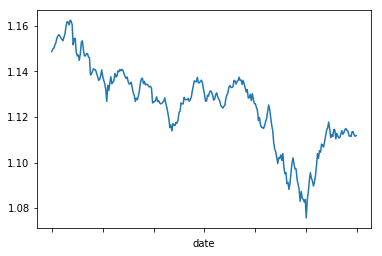

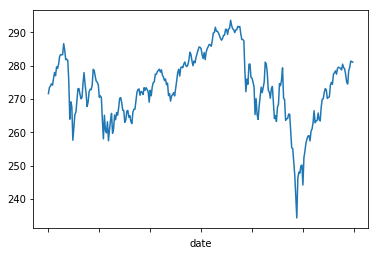

In [5]:
lqd, _ = ts.get_daily_adjusted(symbol='LQD', outputsize='full')
ief, _ = ts.get_daily_adjusted(symbol='IEF', outputsize='full')
spy_u, _ = ts.get_daily_adjusted(symbol='SPY', outputsize='full')

data = lqd['4. close'] / ief['4. close']
data = data.tail(300)
data.plot()
plt.show()

spy = spy_u['4. close']
spy = spy.tail(300)
spy.plot()
plt.show()

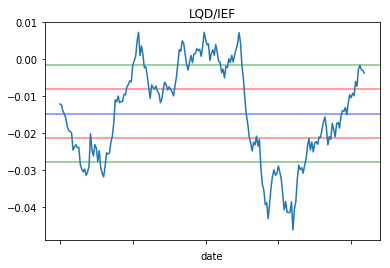

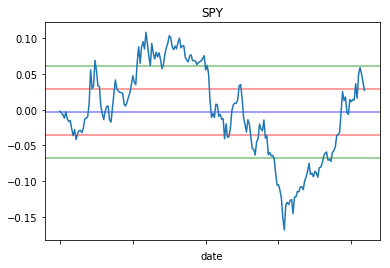

In [6]:
spy_chg = spy.pct_change(periods=90).dropna()
data_chg = data.pct_change(periods=90).dropna()
plt.figure()

mean1 = data_chg.values.mean()
std_h1 = data_chg.values.std(ddof=1) / 2
std1 = data_chg.values.std(ddof=1)

plt.axhline(y=mean1+std_h1, color='r', alpha=0.5)
plt.axhline(y=mean1-std_h1, color='r', alpha=0.5)
plt.axhline(y=mean1+std1, color='g', alpha=0.5)
plt.axhline(y=mean1-std1, color='g', alpha=0.5)
plt.axhline(y=mean1, color='b', alpha=0.5)

data_chg.plot()
plt.title('LQD/IEF')
plt.show()

plt.figure()

mean2 = spy_chg.values.mean()
std_h2 = spy_chg.values.std(ddof=1) / 2
std2 = spy_chg.values.std(ddof=1)

plt.axhline(y=mean2+std_h2, color='r', alpha=0.5)
plt.axhline(y=mean2-std_h2, color='r', alpha=0.5)
plt.axhline(y=mean2+std2, color='g', alpha=0.5)
plt.axhline(y=mean2-std2, color='g', alpha=0.5)
plt.axhline(y=mean2, color='b', alpha=0.5)

spy_chg.plot()
plt.title('SPY')
plt.show()